In [ ]:
!pip install geopandas contextily

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gdp
import contextily as ctx

In [ ]:
province = gdp.read_file("/content/drive/MyDrive/Colab Notebooks/ProvCM01012022_g")

In [ ]:
comuni = gdp.read_file("/content/drive/MyDrive/Colab Notebooks/Com01012022_g")

In [ ]:
corsi_acqua = gdp.read_file("/content/drive/MyDrive/Colab Notebooks/Corsi_acqua_Piano_di_Gestione.zip")

In [ ]:
province3857 = province.to_crs(3857)
comuni3857 = comuni.to_crs(3857)
corsi_acqua3857 = corsi_acqua.to_crs(3857)

1. visualizzi su una mappa i 10 corsi d'acqua più lunghi della provincia di Milano

In [ ]:
provincia_milano = province3857[province3857["DEN_UTS"] == "Milano"].geometry.item()

In [ ]:
corsi_acqua_provinciaMilano = corsi_acqua3857[corsi_acqua3857.intersects(provincia_milano)]

In [ ]:
corsi_acqua_provinciaMilano10 = corsi_acqua_provinciaMilano.sort_values(by="SHAPE_LEN", ascending=False).head(10)

In [ ]:
provincia_milano_serie = gdp.GeoSeries([provincia_milano])

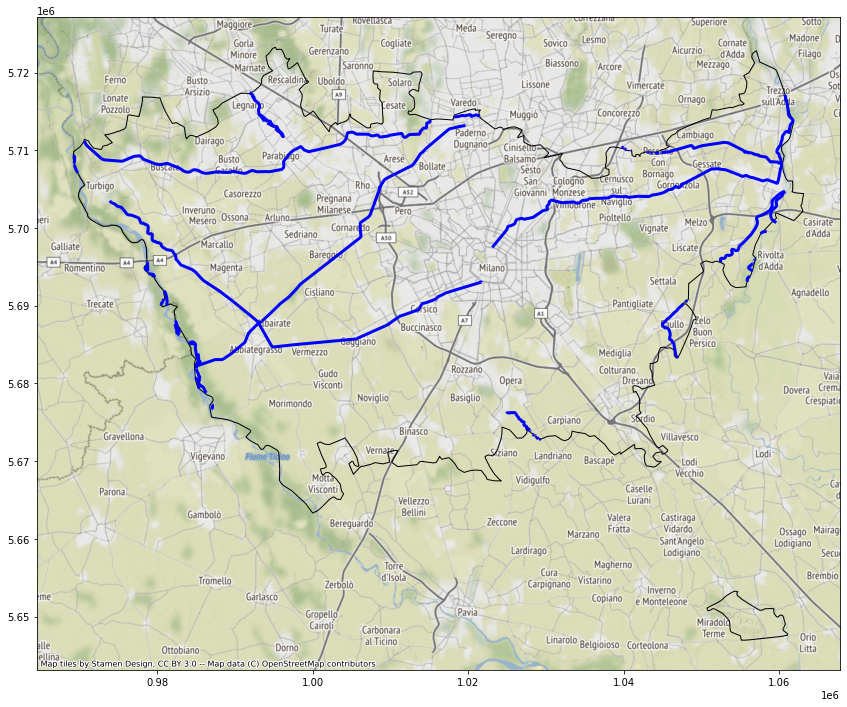

In [ ]:
ax = corsi_acqua_provinciaMilano10.plot(figsize = (15, 12), edgecolor = "blue", linewidth = 3)
provincia_milano_serie.plot(ax = ax, edgecolor = "k", facecolor = "none")
ctx.add_basemap(ax)

2.  visualizzi su una mappa i Navigli e i fiumi da cui prendono l'acqua. Utilizzare colori diversi per rappresentare i navigli rispetto ai fiumi ed evidenziare bene i percorsi sulla mappa

In [ ]:
navigli_milano = corsi_acqua3857[corsi_acqua3857["NOME"].str.contains("Naviglio")].unary_union
navigli_milano

In [ ]:
fiumi_navigli = corsi_acqua3857[corsi_acqua3857.touches(navigli_milano)]
fiumi_navigli

In [ ]:
navigli_milano_serie = gdp.GeoSeries([navigli_milano])

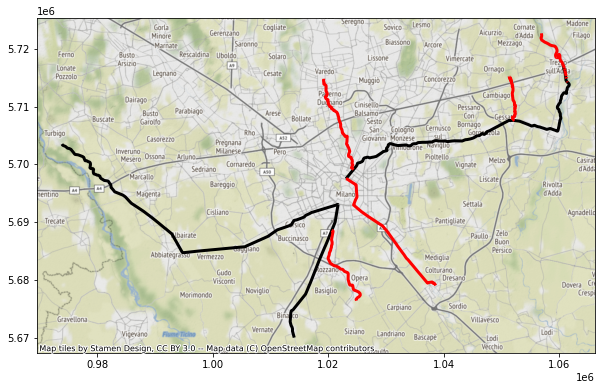

In [ ]:
ax = navigli_milano_serie.plot(figsize = (10, 20), edgecolor = "k", linewidth = 3)
fiumi_navigli.plot(ax = ax, edgecolor = "red", linewidth = 3)
ctx.add_basemap(ax)

3.  visualizzi su una mappa i corsi d'acqua che passano in un comune inserito dall'utente

In [ ]:
regioni = gdp.read_file("/content/drive/MyDrive/Colab Notebooks/Reg01012022_g (1)")

In [ ]:
regioni3857 = regioni.to_crs(3857)

In [ ]:
lombardia = regioni3857[regioni3857["DEN_REG"] == "Lombardia"].geometry.item()

In [ ]:
comune_inserito = input("inserire un comune: ")
comune_selezionato = comuni3857[comuni3857["COMUNE"] == comune_inserito].geometry.item()
if comune_selezionato.within(lombardia) == True:
  corsi_acqua_comune_selezionato = corsi_acqua3857[corsi_acqua3857.intersects(comune_selezionato)]
  comune_selezionato2 = gdp.GeoSeries([comune_selezionato])
  ax = corsi_acqua_comune_selezionato.plot(figsize = (15, 12), edgecolor = "blue", linewidth = 3)
  comune_selezionato2.plot(ax = ax, edgecolor = "k", facecolor = "none")
  ctx.add_basemap(ax)
else:
  print("comune non in lombardia")

inserire un comune: Roma
comune non in lombardia


4. visualizzi su una mappa un fiume inserito dall'utente con tutti i comuni  che attraversa. Se attraversa Milano, visualizzare solo i quartieri che attraversa

In [ ]:
quartieri = gdp.read_file("/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm.zip")

In [ ]:
quartieri3857 = quartieri.to_crs(3857)

inserire un fiume: Olona (Fiume)


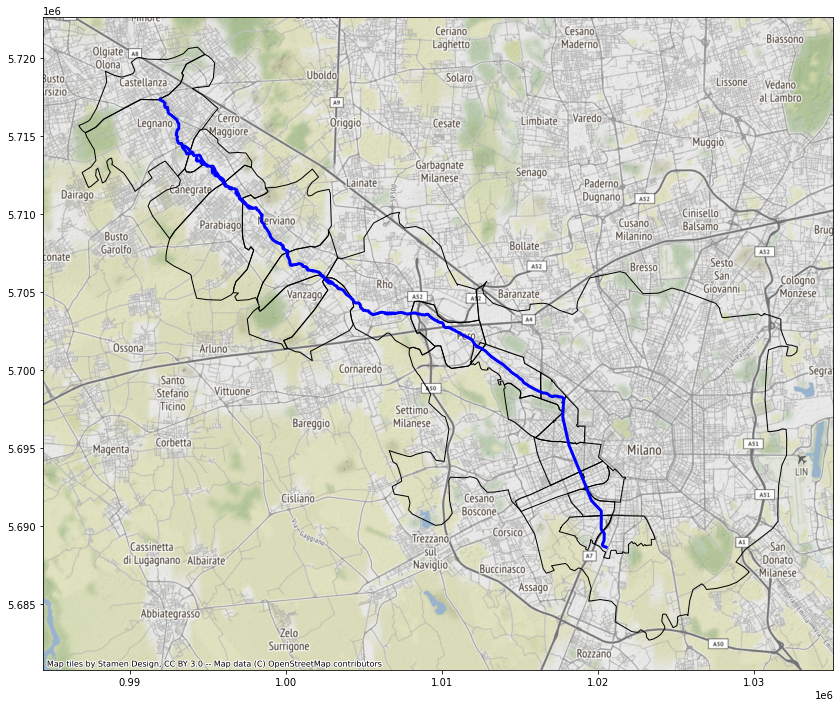

In [ ]:
fiume_inserito = input("inserire un fiume: ")
fiume_selezionato = corsi_acqua3857[corsi_acqua3857["NOME"] == fiume_inserito].unary_union
comuni_fiume = comuni3857[comuni3857.intersects(fiume_selezionato)]
quartieri_fiume = quartieri3857[quartieri3857.intersects(fiume_selezionato)]
fiume_selezionato2 = gdp.GeoSeries([fiume_selezionato])
ax = fiume_selezionato2.plot(figsize = (15, 12), edgecolor = "blue", linewidth = 3)
comuni_fiume.plot(ax = ax, edgecolor = "k", facecolor = "none")
quartieri_fiume.plot(ax = ax, edgecolor = "k", facecolor = "none")
ctx.add_basemap(ax)

5.  visualizzi il numero di corsi d'acqua della provincia di Milano e la lunghezza totale di tutti i corsi d'acqua

In [ ]:
len(corsi_acqua_provinciaMilano)

45

In [ ]:
sum(corsi_acqua_provinciaMilano.length)

776192.6342545158

6. visualizzi su una mappa i comuni della provincia di Milano che non sono attraversati da corsi d'acqua

In [ ]:
comuni_provincia_lombardia = comuni3857[comuni3857.within(provincia_milano)]

In [ ]:
corsi_acqua_oggetto = corsi_acqua3857.unary_union

In [ ]:
comuni_provincia_lombardia_nofiume = comuni_provincia_lombardia[comuni_provincia_lombardia.intersects(corsi_acqua_oggetto) == False]

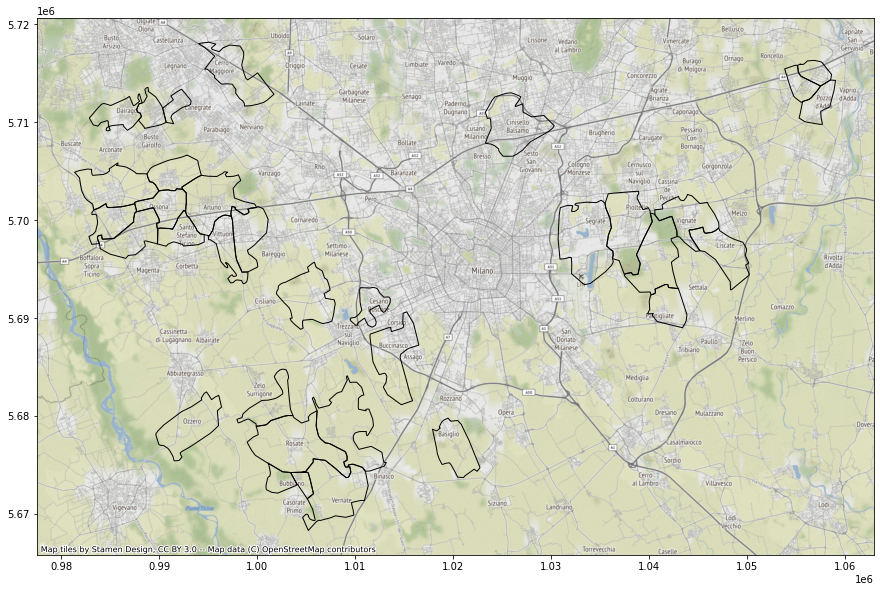

In [ ]:
ax = comuni_provincia_lombardia_nofiume.plot(figsize = (15, 12), edgecolor = "k", facecolor = "none")
ctx.add_basemap(ax)